In [1]:
# here are all the lib that need to be imported:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as mpatches

In [2]:
wine_df = pd.read_csv('/Users/katrin/WineNot/TechLabsDUS_WineNot/data/cleaned/df_wine1.csv')
display(wine_df)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,United States of America,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,United States of America,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,United States of America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,United States of America,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
# Group the DataFrame by 'variety' and calculate the mean points for each group
mean_points_per_variety = wine_df.groupby('variety')['points'].mean()

# Display the mean points for each variety
print(mean_points_per_variety)

variety
Abouriou       87.666667
Agiorgitiko    87.031746
Aglianico      89.275766
Aidani         82.000000
Airen          81.666667
                 ...    
Zinfandel      87.828666
Zlahtina       86.000000
Zweigelt       88.296651
Çalkarası      86.500000
Žilavka        88.000000
Name: points, Length: 707, dtype: float64


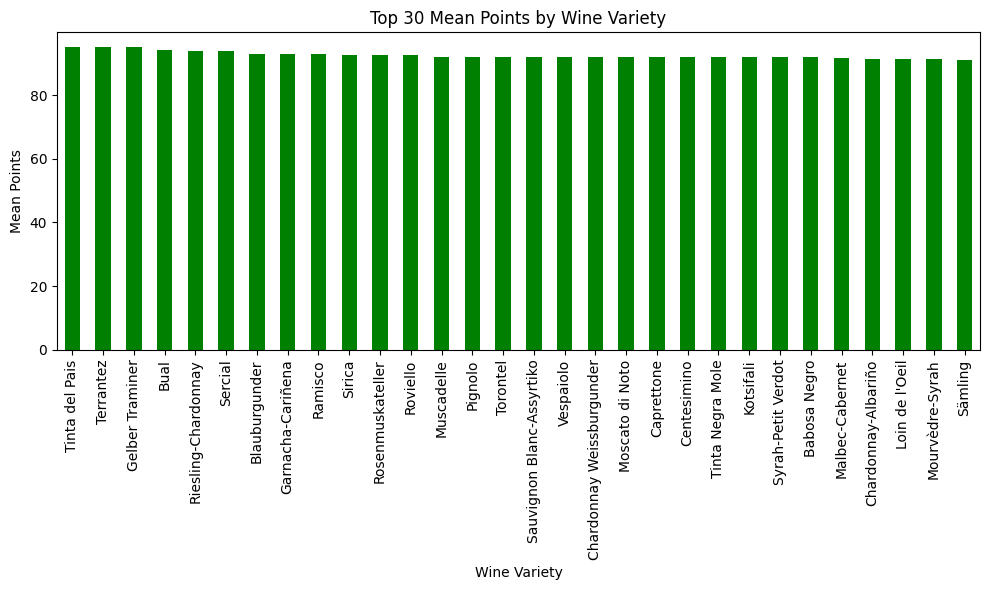

In [19]:
# Assuming 'mean_points_per_variety' is your Series containing mean points for each variety
# Sort the mean points in descending order
mean_points_sorted = mean_points_per_variety.sort_values(ascending=False)

# Slice the first 30 values
mean_points_top30 = mean_points_sorted.head(30)

# Plot the top 30 mean values
mean_points_top30.plot(kind='bar', figsize=(10, 6), color='green')

# Add title and labels
plt.title('Top 30 Mean Points by Wine Variety')
plt.xlabel('Wine Variety')
plt.ylabel('Mean Points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

In [26]:
# Group the DataFrame by 'variety' and 'country', and calculate the mean points for each group
mean_points_per_variety_country = wine_df.groupby(['variety', 'country'])['points'].mean().reset_index()

# Calculate the mean points for each variety
mean_points_per_variety = mean_points_per_variety_country.groupby('variety')['points'].mean()

# Get the top 30 varieties based on mean points
top_varieties = mean_points_per_variety.nlargest(10).index

# Filter the DataFrame to include only the top 30 varieties
top_varieties_df = mean_points_per_variety_country[mean_points_per_variety_country['variety'].isin(top_varieties)]

# Pivot the filtered DataFrame to have 'variety' as rows, 'country' as columns, and 'points' as values
pivot_table = top_varieties_df.pivot_table(index='variety', columns='country', values='points', fill_value=0)

# Display the pivot table as a DataFrame
print(pivot_table)

country              Austria   Portugal  Spain  United States of America
variety                                                                 
Blauburgunder           93.0   0.000000    0.0                       0.0
Bual                     0.0  94.142857    0.0                       0.0
Garnacha-Cariñena        0.0   0.000000   93.0                       0.0
Gelber Traminer         95.0   0.000000    0.0                       0.0
Ramisco                  0.0  93.000000    0.0                       0.0
Riesling-Chardonnay      0.0   0.000000    0.0                      94.0
Rosenmuskateller        92.5   0.000000    0.0                       0.0
Sercial                  0.0  94.000000    0.0                       0.0
Terrantez                0.0  95.000000    0.0                       0.0
Tinta del Pais           0.0   0.000000   95.0                       0.0


In [27]:
# Sort the DataFrame along the rows axis (varieties) based on mean points for each variety
pivot_table_sorted = pivot_table.loc[pivot_table.mean(axis=1).sort_values(ascending=False).index]

# Display the sorted pivot table
print(pivot_table_sorted)


country              Austria   Portugal  Spain  United States of America
variety                                                                 
Gelber Traminer         95.0   0.000000    0.0                       0.0
Terrantez                0.0  95.000000    0.0                       0.0
Tinta del Pais           0.0   0.000000   95.0                       0.0
Bual                     0.0  94.142857    0.0                       0.0
Riesling-Chardonnay      0.0   0.000000    0.0                      94.0
Sercial                  0.0  94.000000    0.0                       0.0
Blauburgunder           93.0   0.000000    0.0                       0.0
Garnacha-Cariñena        0.0   0.000000   93.0                       0.0
Ramisco                  0.0  93.000000    0.0                       0.0
Rosenmuskateller        92.5   0.000000    0.0                       0.0


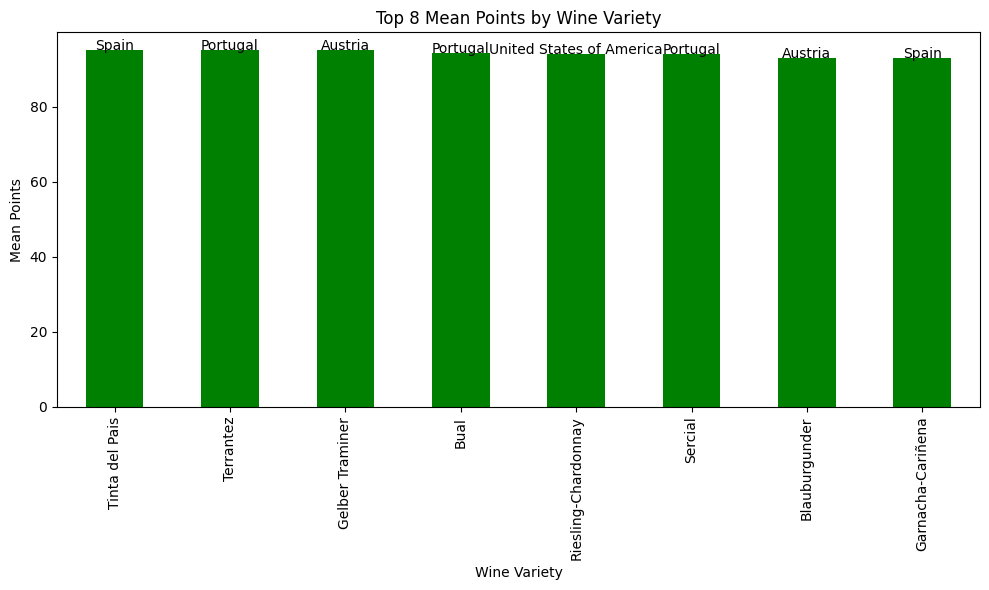

In [29]:
# Sort the mean points in descending order
mean_points_sorted = mean_points_per_variety.sort_values(ascending=False)

# Slice the first 10 values
mean_points_top8 = mean_points_sorted.head(8)

# Plot the top 10 mean values
ax = mean_points_top8.plot(kind='bar', figsize=(10, 6), color='green')

# Add title and labels
plt.title('Top 8 Mean Points by Wine Variety')
plt.xlabel('Wine Variety')
plt.ylabel('Mean Points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Annotate each bar with the corresponding countries
for i, mean_point in enumerate(mean_points_top8):
    variety = mean_points_top8.index[i]
    countries = pivot_table.loc[variety].idxmax()
    ax.text(i, mean_point, countries, ha='center')

# Show plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

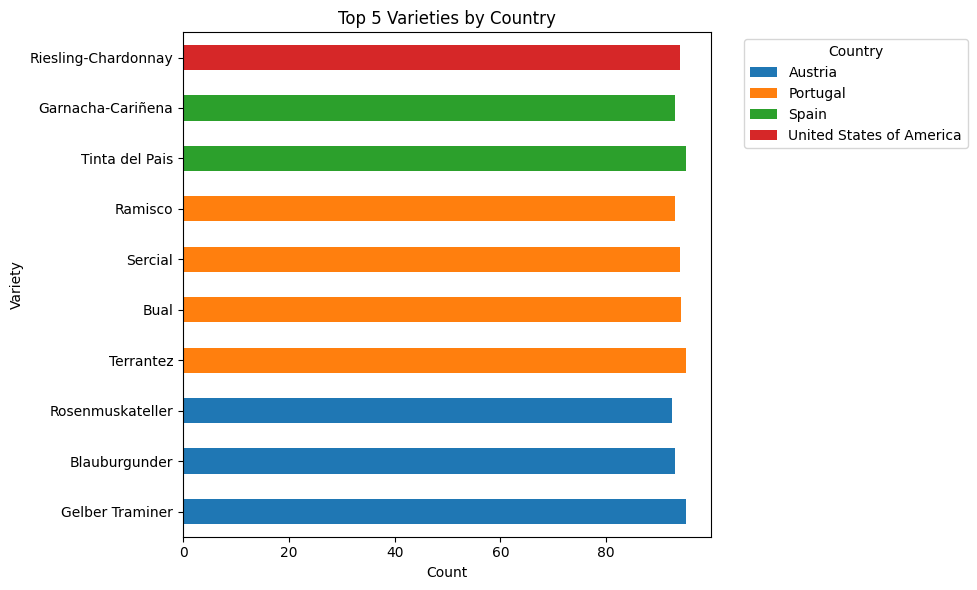

In [36]:
# Replace NaN values with 0
pivot_table_filled = pivot_table.fillna(0)

# Sort the DataFrame based on the mean points for each variety
pivot_table_sorted = pivot_table_filled.sort_values(by=pivot_table_filled.columns.tolist(), ascending=False)

# Filter out rows (varieties) where all values are 0
pivot_table_filtered = pivot_table_sorted[(pivot_table_sorted.T != 0).any()]

# Get the best varieties based on the highest mean points
best_varieties = pivot_table_filtered.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # Set color palette
best_varieties.plot(kind='barh', stacked=True, color=colors, figsize=(10, 6))
plt.title('Top 5 Varieties by Country')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()